<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-19
# DS-Unit-1-Sprint-4-Linear-Algebra-master/
# module3-dimensionality-reduction/

**Lecture Notebook**  
https://colab.research.google.com/drive/19eXBnbYmtFFrNjqtLpnfdXoOMRSaS-1f  
https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb  
my PyTorch code  
https://github.com/Nov05/Google-Colaboratory/blob/master/densenet169v2.ipynb  

In [0]:
# Update PIL version to later than 4.0.0 or you might encounter the following error.
# AttributeError: module 'PIL.Image' has no attribute 'register_extensions'
!pip install --no-cache-dir -I pillow

In [1]:
# Restart runtime before running this code block if new PIL installed
import torch
print("PyTorch version: ", torch.__version__)
print("CUDA version: ", torch.version.cuda)
print("cuDNN version is: ", torch.backends.cudnn.version())
print('Device:', torch.device('cuda:0'))

import PIL
print('Python PIL version:', PIL.PILLOW_VERSION)

PyTorch version:  1.1.0
CUDA version:  10.0.130
cuDNN version is:  7501
Device: cuda:0
Python PIL version: 6.0.0


In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('drive')
root = 'drive/My Drive/'

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import ticker 
import seaborn as sns

import json
import time
import datetime

import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler
from collections import OrderedDict

from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.debugger import Tracer
import warnings
warnings.filterwarnings('ignore')

### MIT Faces Recognition Project database

http://courses.media.mit.edu/2004fall/mas622j/04.projects/faces/  

```
load ev.mat
load faceR

v = faceR(5, 2:100)';
i = eigenfaces'*v + mean_face';
imagesc(reshape(i, 128, 128)'); colormap(gray(256));
```

drive/My Drive/data/mitfaces/raw/1227
sum: 230398 
shape: (16384,)


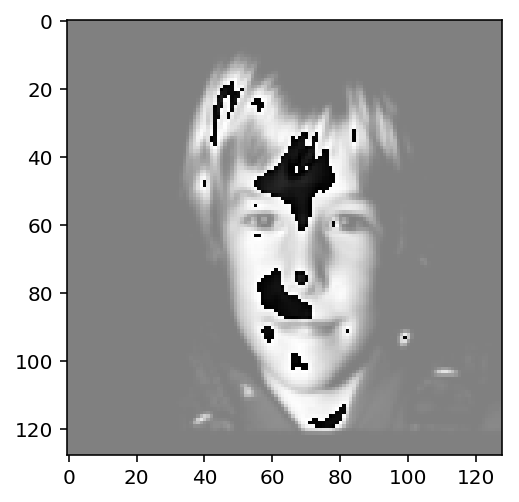

In [8]:
# test image importing
def display_raw(filename="1227"):
  filepath = root + 'data/mitfaces/raw/' + filename
  print(filepath)
  raw = np.fromfile(filepath, dtype='int8', sep="")
  print("sum:", raw.sum(), "\nshape:", raw.shape)
  img = np.reshape(raw, (128, 128))
  plt.imshow(img, cmap="gray")
  plt.show()
  
display_raw()

drive/My Drive/data/mitfaces/raw/1223
sum: -10278 
shape: (16384,)


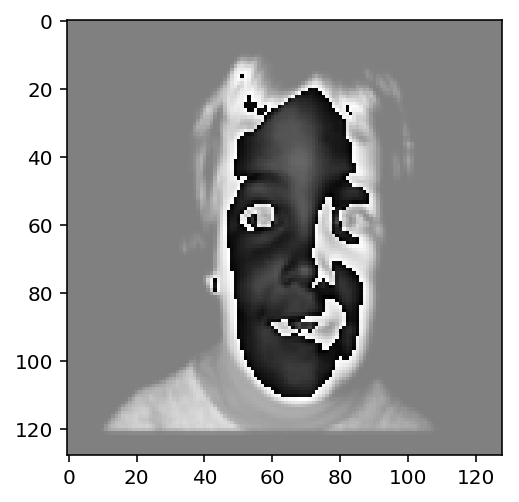

In [9]:
display_raw("1223")

https://courses.media.mit.edu/2004fall/mas622j/04.projects/faces/  
On the class web page you will find four **ascii data files** extracted from the Eigenface database. Two of the files, faceR and faceS, contain 99 coefficients for each of 2000 faces. faceR should be used as training data; faceS for testing. Each row contains **100 elements**. The first element of each row contains a face number (running from 1223 to 5223); **the remaining 99 are coefficients** measuring how much that face projects onto the corresponding eigenvector.  

In [11]:
filepath = root + 'data/mitfaces/faces/faceR'
print(filepath)
raw = np.fromfile(filepath, dtype='int8', sep="")
print("sum:", raw.sum(), "\nshape:", raw.shape)

drive/My Drive/data/mitfaces/faces/faceR
sum: 108772136 
shape: (2198477,)


https://python4astronomers.github.io/files/asciifiles.html  

In [18]:
filepath = root + 'data/mitfaces/faces/faceR'
print(filepath)
f = open(filepath, 'r')
for line in f:
  str=repr(line)
  print(str)
  break

drive/My Drive/data/mitfaces/faces/faceR
' 1223 -1779.619019 2107.301270 807.759949 -654.226135 322.416931 1075.673706 559.180786 452.465454 -561.820374 74.668030 67.978477 198.796906 22.676338 -172.910126 306.917023 154.041595 -403.840271 -66.760246 100.143784 -189.239578 35.033672 -291.399200 -12.720598 120.488663 -325.439758 -237.672791 -162.531113 -184.136658 214.378540 -168.662018 193.702835 -253.508377 -270.742218 293.662354 -15.763512 130.660538 -39.088024 -209.809036 112.635559 -54.906422 -223.773926 151.183868 -174.183105 311.799347 -131.172348 100.358414 -39.231071 143.831268 -26.763599 -134.834457 22.852604 37.737930 61.850765 -220.789551 127.344765 42.378975 25.868210 -40.372673 -97.774818 144.796448 13.325173 -80.345116 20.910030 -85.240402 -57.382092  9.731221 64.159706 41.712112 139.698776 131.256653 -123.708351 -81.298141 -85.131653 39.110416 229.450867 -74.828201 164.768158 76.867096 -55.710514 -38.793930 146.945541 -168.382278 16.658672 257.251373 140.037918 131.17808

In [21]:
line = line.strip()
cols = line.split()
print(len(cols))
cols[:5]

100


['1223', '-1779.619019', '2107.301270', '807.759949', '-654.226135']

In [0]:
# i = eigenfaces'*v + mean_face';
# imagesc(reshape(i, 128, 128)'); colormap(gray(256));

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

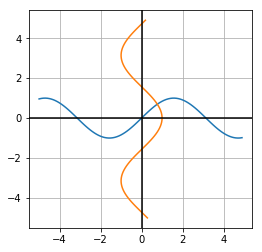

In [4]:
x1 = np.arange(-5, 5, 0.1)
y1 = np.sin(x1)

y2 = np.arange(-5, 5, 0.1)
x2 = np.cos(y2)

plt.figure(figsize=(4, 4))
ax = plt.subplot(111)
ax.grid(True)
plt.plot(x1, y1)
plt.plot(x2, y2)
ax.axhline(0, color='black')
ax.axvline(0, color='black');


## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

https://en.wikipedia.org/wiki/Vertical_line_test  
A function can only have one output, y, for each unique input, x. For the graphs that don't pass the vertical line test, a unique input might have mutiple outputs.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [0]:
# R1: for input 1, there are two outputs 2 and 3. so it is not a function.
# R2: it is a function.
# R3: for input 9, there are two outputs 4 and 6. so it doesn't qualify as a function.
# R4: for input 6, there are two outputs 2 and 4. so it can't not be a function.
# R5: for input 2, there are two outputs 6 and 4. so it is not a function.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In [0]:
# 1. for m, 3D to 3D
# 2. for n, 4D to 2D

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [0]:
# 1. converting low resolution images to high resolution images
# 2. adding columns (creating features) to a dataset

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [8]:
mp = [[1, 3],
      [2, -1]
     ]
mq = [[4, 1, 2],
      [2, -1, 3],
      [5, -2, 1]
     ]
input1 = [1, 1]
input2 = [2, 3]
input3 = [1, 1, 1]
input4 = [2, 3, 4]
print(np.matmul(mp, input1))
print(np.matmul(mp, input2))
print(np.matmul(mq, input3))
print(np.matmul(mq, input4))

[4 1]
[11  1]
[7 4 4]
[19 13  8]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
# verified

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors  

In linear algebra, an eigenvector or characteristic vector of a linear transformation is a non-zero vector that changes by only a scalar factor when that linear transformation is applied to it. More formally, if T is a linear transformation from a vector space V over a field F into itself and v is a vector in V that is not the zero vector, then v is an eigenvector of T if T(v) is a scalar multiple of v. This condition can be written as the equation

T(v) = lamda * v

where λ is a scalar in the field F, known as the eigenvalue, characteristic value, or characteristic root associated with the eigenvector v.  

In [0]:
# @#$%^&* <- my own words

# alright. an eigenvector is a vector that won't change in direction but will 
# only change in length, when a linear transformation is applied to it. and the 
# length of the vector is its eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

In [0]:
# 1. hard to imagine it with a human brain
# 2. more difficult to make sense of some information
# 3. more calculation

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In [0]:
# rule of thumb = a broadly accurate guide or principle, 
#                 based on experience or practice rather than theory

# like "number of observations should be at least 5 times of number
# of parameters"?

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [66]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv"
iris = pd.read_csv(url)
print(iris.shape)
iris.head(4)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [67]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [68]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
means = iris.describe().loc['mean']
stds = iris.describe().loc['std']
means

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
Name: mean, dtype: float64

In [70]:
# numpy array features

v1 = np.array([1, 2, 3, 4])
v2 = np.array([1, 2, 3, 4])
v3 = np.array([[1, 2, 3, 4],
               [2, 4, 6, 8]
             ])
print(v1/v2)
print(v3/v1)
print(v3/2)

[1. 1. 1. 1.]
[[1. 1. 1. 1.]
 [2. 2. 2. 2.]]
[[0.5 1.  1.5 2. ]
 [1.  2.  3.  4. ]]


In [71]:
# check values
df_center = pd.DataFrame([(np.array(row)-means) 
                           for row in iris.iloc[:,:-1].values])
df_center.head(2)

,sepal_length,sepal_width,petal_length,petal_width
mean,-0.743333,0.446,-2.358667,-0.998667
mean,-0.943333,-0.054,-2.358667,-0.998667


In [72]:
# 4) Calculate the Variance-Covariance matrix of Z.
Z = pd.DataFrame([(np.array(row)-means) / stds
                  for row in iris.iloc[:,:-1].values])
Z.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593


In [73]:
print(Z.T.shape)
print(Z.shape)

(4, 150)
(150, 4)


In [74]:
# something with unknown meanings, ignore it
Y = pd.DataFrame([(np.array(row)-means)/(stds**2)
                  for row in iris.iloc[:,:-1].values])
ZY = np.matmul(Y.T.values, Y.values)
ZY

array([[ 217.29824962,  -45.3871493 ,   88.90234161,  192.85633652],
       [ -45.3871493 ,  792.53621585,  -81.89987551, -160.54615646],
       [  88.90234161,  -81.89987551,   47.8610385 ,  106.53318235],
       [ 192.85633652, -160.54615646,  106.53318235,  255.83162274]])

## Variance-Covariance  

<img src="https://cdn.educba.com/academy/wp-content/uploads/2019/05/Covariance-Formula.jpg" width="300">

In [104]:
# 4) Calculate the Variance-Covariance matrix of Z.【Issue】
# I think Z should be Correlation-Coefficient matrix of Z.
Z = pd.DataFrame([(np.array(row)-means) / stds
                  for row in iris.iloc[:,:-1].values])
CORR = np.matmul(Z.T.values, Z.values)
print(CORR)

[[149.         -16.29601824 129.89136944 121.87509137]
 [-16.29601824 149.         -62.65689836 -53.12506935]
 [129.89136944 -62.65689836 149.         143.45080746]
 [121.87509137 -53.12506935 143.45080746 149.        ]]


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html  
Returns the covariance matrix of the DataFrame’s time series. The covariance is normalized by N-1.  

In [109]:
# see how far it is from a covariance matrix
print(iris.cov(), '\n')

W = pd.DataFrame([(np.array(row)-means)
                  for row in iris.iloc[:,:-1].values])
COV = np.matmul(W.T.values, U.values)/(iris.shape[0]-1)
print(COV)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.039268      1.273682     0.516904
sepal_width      -0.039268     0.188004     -0.321713    -0.117981
petal_length      1.273682    -0.321713      3.113179     1.296387
petal_width       0.516904    -0.117981      1.296387     0.582414 

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [77]:
iris.sepal_length.var()

0.6856935123042505

## Correlation Coefficient  

<img src="http://www.stat.yale.edu/Courses/1997-98/101/cor.gif" width="300">

In [107]:
np.matmul(Z.T.values, Z.values) / (iris.shape[0]-1)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [79]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


**What are the Eigenvectors and Eigenvalues of the Variance-Covariance Matrix?**  

In [81]:
# 5) Calculate the Eigenvectors and Eigenvalues of the Variance-Covariance Matrix.

# What are the Eigenvectors and Eigenvalues of the Variance-Covariance Matrix? 
# The eigenvectors are those that run along the dimensions that maximize the 
# variance along that dimension. Remember our rotated elipse example? When 
# we moved our elipse off of the x and y axis we then didn't know what line 
# we should project the points onto so that they we could collapse the dimension 
# of least variance. Well now we do!

eigenvalues, eigenvectors = np.linalg.eig(COV)
print(eigenvalues, '\n\n', eigenvectors)

[433.71189448 137.26191868  21.95563847   3.07054838] 

 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [82]:
# percentage of variance covered by each PCA
eigenvalues / eigenvalues.sum()

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [83]:
# eigenvector matrix feature: E^-1 = E^T
# a.k.a. its inverse matrix = itself
np.dot(np.linalg.inv(eigenvectors), eigenvectors).round(10)

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [84]:
# numpy.matmul() features
a1 = np.array([[1, 2, 3],
               [4, 5, 6]
              ])
a2 = np.array([[2, 0],
               [0, 3]
              ])
print(np.matmul(a2.T, a1))
print(np.matmul(a1.T, a2).T)

[[ 2  4  6]
 [12 15 18]]
[[ 2  4  6]
 [12 15 18]]


In [87]:
print(iris.head(), '\n')
df_pca = pd.DataFrame(np.dot(df_center.values, eigenvectors[:2,:].T))
df_pca['species'] = iris['species']
df_pca.head()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa 



,0,1,species
0,0.884642,-0.663943,setosa
1,0.966327,-0.148494,setosa
2,0.859490,-0.305138,setosa
3,0.700282,-0.137840,setosa
4,0.795173,-0.730163,setosa


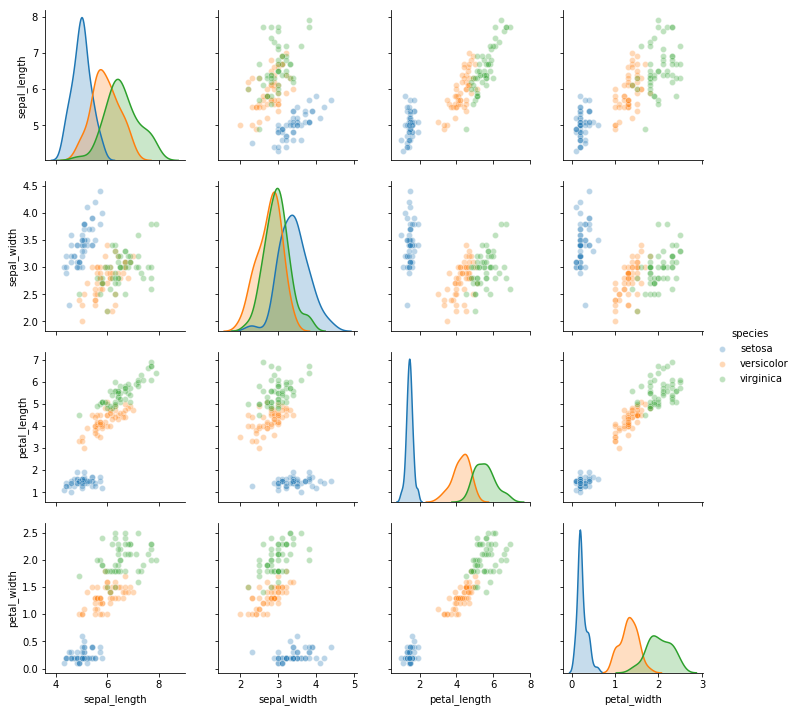

In [121]:
sns.pairplot(data=iris, hue='species', 
             plot_kws={'alpha': 0.3});

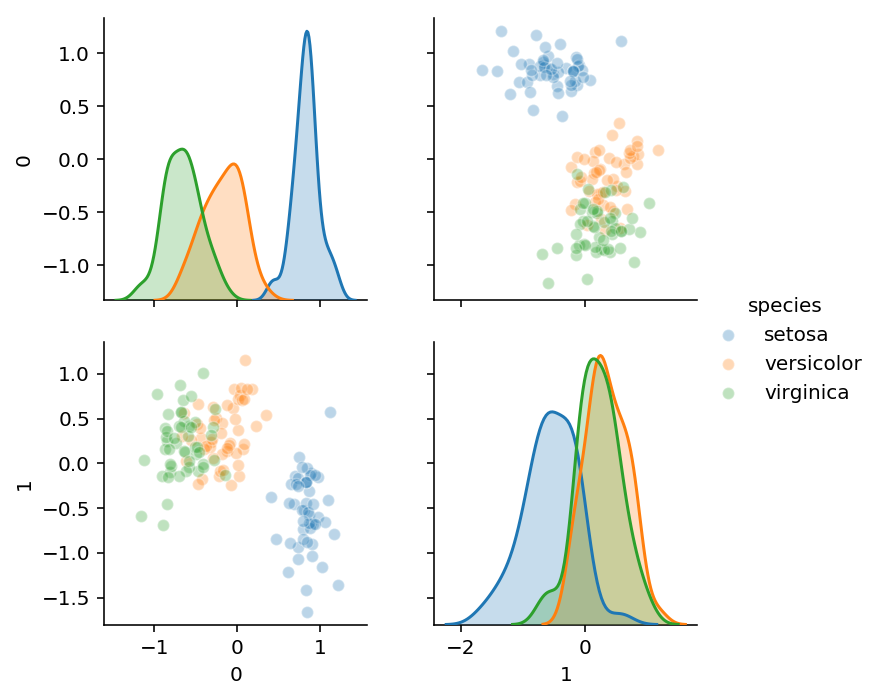

In [88]:
# seaborn pairplot for PCAs
sns.pairplot(data=df_pca, hue='species',
             plot_kws={'alpha': 0.3});

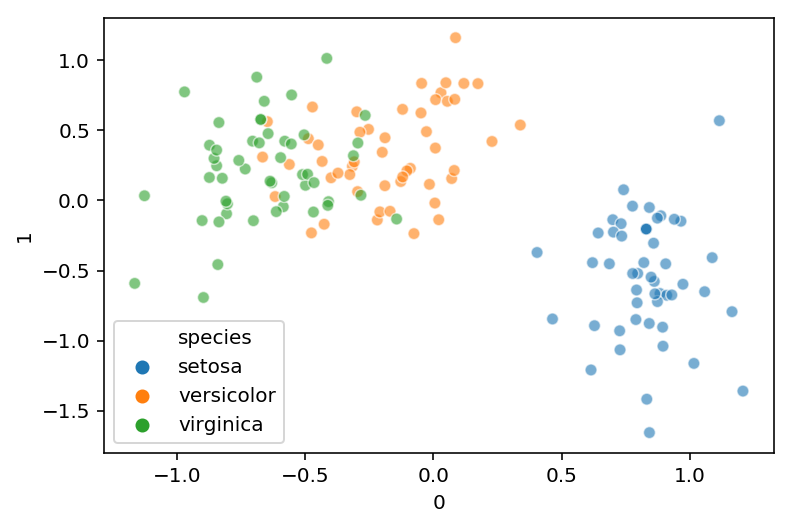

In [89]:
# seaborn scatterplot for the 1st PCA and the 2nd PCA
sns.scatterplot(x=0, y=1, data=df_pca, hue='species',
                alpha=0.6);

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<img src="https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg" width="400">

You don't necessarily have to use this resource, but this will get you started:   
https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/  

In [0]:
!wget https://upload.wikimedia.org/wikipedia/zh/thumb/3/34/Lenna.jpg/200px-Lenna.jpg -O lenna.jpg

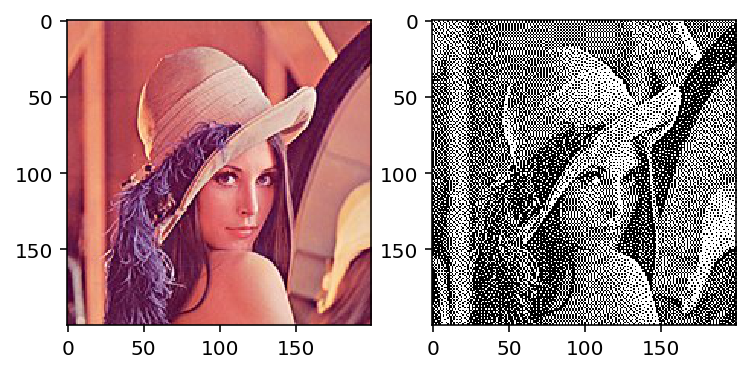

In [99]:
filename = "lenna.jpg"
im = PIL.Image.open(filename)
im.save('lenna_color.png')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

img = Image.open("lenna_color.png") # open colour image
ax1.imshow(img)
img = img.convert('1') # convert image to black and white
img.save('lenna.png')
ax2.imshow(img, cmap="gray");

## Some other stuff

In [29]:
# Create a list of 50 random floats and add them to a dataframe
N = 50
x = np.random.rand(N)*100

# Crete Dataframe
data = {"x": x}
df = pd.DataFrame(data)
df.head(3)

,x
0,4.000540
1,62.875611
2,82.029254


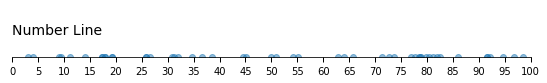

In [30]:
# Plot the floats on a number line

# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)
    
plt.figure(figsize=(8, 6))
n = 8

# Create some y values to satisfy matplotlib
df['y'] = pd.Series(list(np.zeros(50)))

# Multiple Locator tick mark settings
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.text(0.0, 0.5, "Number Line", fontsize=14,
        transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)
plt.scatter(df.x, df.y, alpha=0.5)

plt.show()

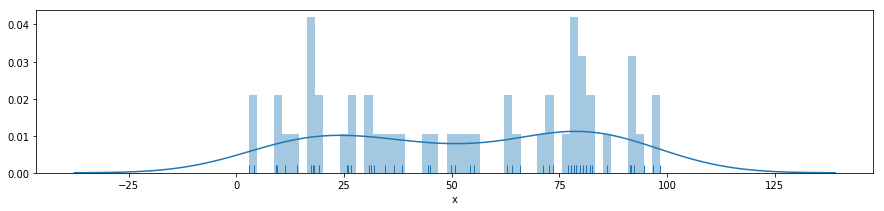

In [31]:
plt.figure(figsize=(15,3))
sns.distplot(df.iloc[:,0], 
             bins=len(df.iloc[:,0]), 
             rug=True);

https://seaborn.pydata.org/generated/seaborn.rugplot.html  

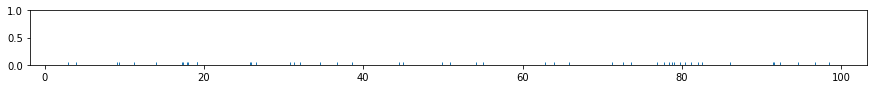

In [32]:
plt.figure(figsize=(15,1))
sns.rugplot(df.iloc[:,0]);

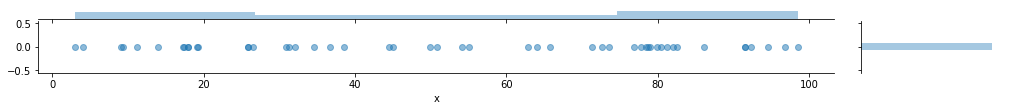

In [33]:
grid = sns.jointplot(df.iloc[:,0], [0]*len(df.iloc[:,0]),
                     alpha=0.5
                    )
grid.fig.set_figwidth(15)
grid.fig.set_figheight(1)